# Travel Package Purchase Prediction by Abimbola Salami

# Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

# Objective

To predict which customer is more likely to purchase the newly introduced travel package.

# Datasets

- CustomerID: Unique customer ID
- ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
- Age: Age of customer
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
- CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
- Occupation: Occupation of customer
- Gender: Gender of customer
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
- PreferredPropertyStar: Preferred hotel property rating by customer
- MaritalStatus: Marital status of customer
- NumberOfTrips: Average number of trips in a year by customer
- Passport: The customer has a passport or not (0: No, 1: Yes)
- OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
- NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
- Designation: Designation of the customer in the current organization
- MonthlyIncome: Gross monthly income of the customer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#!pip install xgboost 
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split

from yellowbrick.classifier import ClassificationReport, ROCAUC

import warnings
warnings.filterwarnings('ignore')

Loading the data

In [2]:
tourism = pd.read_excel('Tourism.xlsx', sheet_name='Tourism')
tourismData = tourism.copy()
tourismData.head(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


# Exploratory Data Analysis

In [3]:
tourismData.shape #Getting the number of rows and columns

(4888, 20)

The data contains 4888 rows and 20 columns

In [4]:
tourismData.duplicated().sum() # checking for duplicates

0

There are no duplicates

In [5]:
tourismData.info() #checking the datatypes and non-null count in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
CustomerID                  4888 non-null int64
ProdTaken                   4888 non-null int64
Age                         4662 non-null float64
TypeofContact               4863 non-null object
CityTier                    4888 non-null int64
DurationOfPitch             4637 non-null float64
Occupation                  4888 non-null object
Gender                      4888 non-null object
NumberOfPersonVisiting      4888 non-null int64
NumberOfFollowups           4843 non-null float64
ProductPitched              4888 non-null object
PreferredPropertyStar       4862 non-null float64
MaritalStatus               4888 non-null object
NumberOfTrips               4748 non-null float64
Passport                    4888 non-null int64
PitchSatisfactionScore      4888 non-null int64
OwnCar                      4888 non-null int64
NumberOfChildrenVisiting    4822 non-null float64
Designation 

- The data consists of numerical and object datatypes
- 'Age', 'TypeofContact', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'NumberOfChildrenVisiting' and 'MonthlyIncome' contain nulls

In [6]:
tourismData.nunique() #getting the number of unique values in each dataset

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

Gender has 3 unique values but is expected to have 2 unique values, this requires treatment

In [7]:
tourismData.describe().T.astype(int) #getting a statistical summary of the dataset

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888,202443,1411,200000,201221,202443,203665,204887
ProdTaken,4888,0,0,0,0,0,0,1
Age,4662,37,9,18,31,36,44,61
CityTier,4888,1,0,1,1,1,3,3
DurationOfPitch,4637,15,8,5,9,13,20,127
NumberOfPersonVisiting,4888,2,0,1,2,3,3,5
NumberOfFollowups,4843,3,1,1,3,4,4,6
PreferredPropertyStar,4862,3,0,3,3,3,4,5
NumberOfTrips,4748,3,1,1,2,3,4,22
Passport,4888,0,0,0,0,0,1,1


- Average age of customers in the dataset is 37 years with the age range spanning from 18 years to 61 years
- 'ProdTaken' is the dependent variable
- 'CityTier', 'Passport' and 'OwnCar' should be treated as categorical variables
- 'CustomerID' should be dropped as it is not relevant in the data analysis

# Data Pre-processing

In [8]:
tourismData = tourismData.drop("CustomerID",axis=1) #dropping the "ID" columns as it is not needed

In [9]:
cat_columns = tourismData.describe(include=['object']).columns
print(cat_columns)

Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')


In [10]:
#Getting the unique values in the object variables

for i in cat_columns:
    if i in ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation']:
        print('Unique values in',i, 'are :')
        print(tourismData[i].value_counts())
        print('-'*50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
--------------------------------------------------
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
--------------------------------------------------
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
--------------------------------------------------
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
--------------------------------------------------
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
--------------------------------------------------
Unique values in Designation are :
Executiv

Gender contains a value 'Fe Male' which can be assumed to be an error for 'Female'

In [11]:
tourismData.Gender.replace('Fe Male', "Female", inplace=True) #Replacing 'Fe Male' with 'Female' in 'Gender'

In [12]:
#Converting 'CityTier', 'Passport' and 'OwnCar' to categorical variables

tourismData.CityTier = tourismData.CityTier.astype("category")
tourismData.Passport = tourismData.Passport.astype("category")
tourismData.OwnCar = tourismData.OwnCar.astype("category")

# Missing Value Treatment

In [13]:
tourismData.isnull().sum()/tourismData.shape[0]*100

ProdTaken                   0.000000
Age                         4.623568
TypeofContact               0.511457
CityTier                    0.000000
DurationOfPitch             5.135025
Occupation                  0.000000
Gender                      0.000000
NumberOfPersonVisiting      0.000000
NumberOfFollowups           0.920622
ProductPitched              0.000000
PreferredPropertyStar       0.531915
MaritalStatus               0.000000
NumberOfTrips               2.864157
Passport                    0.000000
PitchSatisfactionScore      0.000000
OwnCar                      0.000000
NumberOfChildrenVisiting    1.350245
Designation                 0.000000
MonthlyIncome               4.766776
dtype: float64

In [14]:
#Dropping missing values of columns will null values less than 1%

tourismData.dropna(subset=['TypeofContact', 'NumberOfFollowups', 'PreferredPropertyStar'], inplace=True)

In [15]:
#Getting the mean Age and Monthly Income of the dataset by grouping by 'Gender', 'Occupation' and 'Designation'

meanData = tourismData[['Gender', 'Occupation', 'Designation', 'Age', 'MonthlyIncome']].groupby(['Gender', 'Occupation', 'Designation']).mean()
meanData

Age  MonthlyIncome
Gender Occupation     Designation                             
Female Large Business AVP             47.928571   31802.285714
                      Executive       29.550000   20148.468750
                      Manager         35.711111   21498.727273
                      Senior Manager  44.772727   27140.136364
                      VP              46.333333   35903.666667
       Salaried       AVP             48.119048   32357.785714
                      Executive       33.435583   20169.057402
                      Manager         38.361842   22542.639731
                      Senior Manager  38.884892   26811.978417
                      VP              51.206897   35452.413793
       Small Business AVP             47.854839   32105.935484
                      Executive       33.694561   19858.808163
                      Manager         37.303125   22672.631922
                      Senior Manager  41.387324   26719.591549
                      VP              47.162162   34808.837838
Male   Free Lancer    Executive       37.500000   18929.000000
       Large Business AVP             49.500000   29959.000000
                      Executive       32.681034   19893.552000
                      Manager         38.584416   22237.873239
                      Senior Manager  39.100000   26779.900000
                      VP              42.500000   36071.000000
       Salaried       AVP             45.900000   32553.600000
                      Executive       33.793169   19777.146520
                      Manager         36.799550   22879.510204
                      Senior Manager  40.702020   26291.919192
                      VP              46.944444   35823.875000
       Small Business AVP             50.181818   32078.681818
                      Executive       32.099010   19828.177570
                      Manager         37.457627   22808.501272
                      Senior Manager  40.333333   26598.910112
                      VP              47.949153   35790.016949

In [16]:
#replacing missing Age values in the dataset with the average Age grouping by gender,occupation and designation
tourismData.Age = tourismData[['Gender', 'Occupation', 'Designation', 'Age']].groupby(['Gender', 'Occupation', 'Designation']).transform(lambda x: x.fillna(round(x.mean())))

In [17]:
#replacing missing Monthly Income values in the dataset with the average Monthly Income grouping by gender,occupation and designation
tourismData.MonthlyIncome = tourismData[['Gender', 'Occupation', 'Designation', 'MonthlyIncome']].groupby(['Gender', 'Occupation', 'Designation']).transform(lambda x: x.fillna(round(x.mean())))

In [18]:
#Getting the respective modes of 'DurationOfPitch', 'NumberOfTrips' and 'NumberOfChildrenVisiting'

print('Mode of DurationOfPitch: ', tourismData.DurationOfPitch.mode())
print('Mode of NumberOfTrips: ', tourismData.NumberOfTrips.mode())
print('Mode of NumberOfChildrenVisiting: ', tourismData.NumberOfChildrenVisiting.mode())

Mode of DurationOfPitch:  0    9.0
dtype: float64
Mode of NumberOfTrips:  0    2.0
dtype: float64
Mode of NumberOfChildrenVisiting:  0    1.0
dtype: float64


In [19]:
#replacing null values for 'DurationOfPitch', 'NumberOfTrips' and 'NumberOfChildrenVisiting' with their respective mode

tourismData.DurationOfPitch.replace(np.nan, 9, inplace=True)
tourismData.NumberOfTrips.replace(np.nan, 2, inplace=True)
tourismData.NumberOfChildrenVisiting.replace(np.nan, 1, inplace=True)

In [20]:
#Checking to confirm if there are missing values

tourismData.isnull().sum()/tourismData.shape[0]*100

ProdTaken                   0.0
Age                         0.0
TypeofContact               0.0
CityTier                    0.0
DurationOfPitch             0.0
Occupation                  0.0
Gender                      0.0
NumberOfPersonVisiting      0.0
NumberOfFollowups           0.0
ProductPitched              0.0
PreferredPropertyStar       0.0
MaritalStatus               0.0
NumberOfTrips               0.0
Passport                    0.0
PitchSatisfactionScore      0.0
OwnCar                      0.0
NumberOfChildrenVisiting    0.0
Designation                 0.0
MonthlyIncome               0.0
dtype: float64

All missing values have been treated

# Univariate Analysis

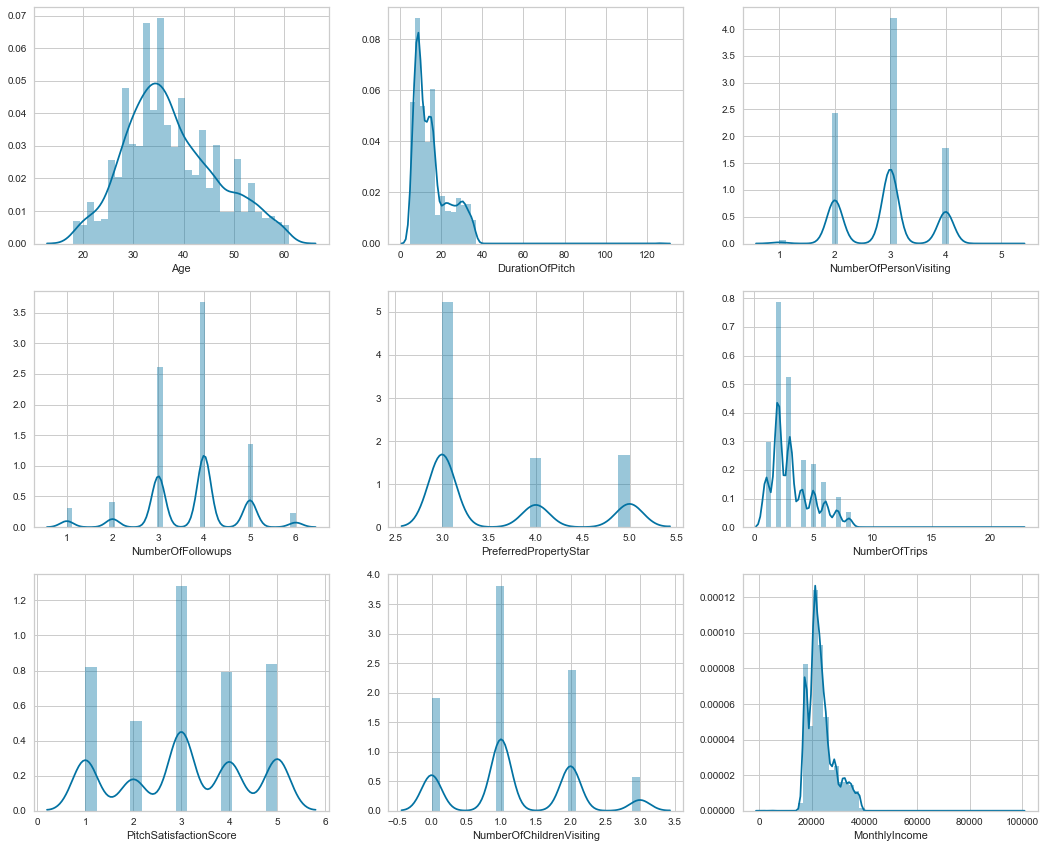

In [21]:
# Plotting univariate analysis on the numeric variables

num_cols = ['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups','PreferredPropertyStar', 'NumberOfTrips', 
             'PitchSatisfactionScore', 'NumberOfChildrenVisiting','MonthlyIncome']

plt.figure(figsize=(18,20))

pos = 1

for i in num_cols:
           
    plt.subplot(4, 3, pos)

    sns.distplot(tourismData[i],kde=True)

    pos += 1 

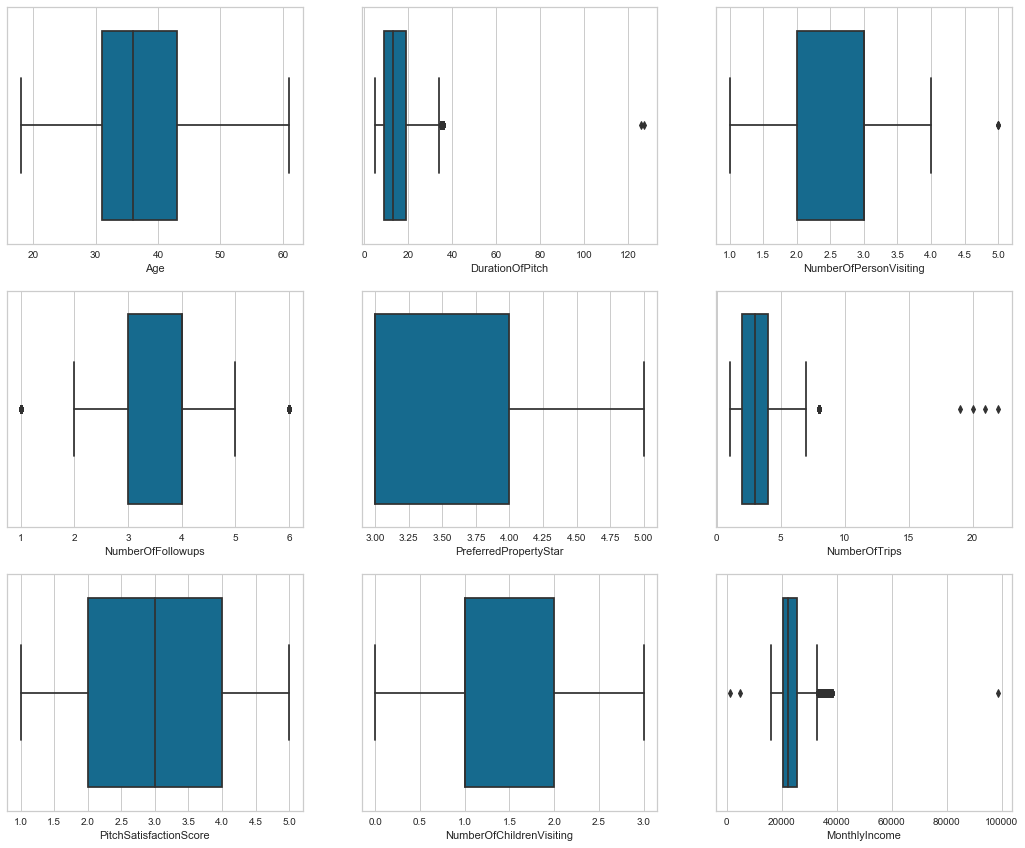

In [22]:
#Checking Outliers using Box plot
plt.figure(figsize=(18,20))

pos = 1

for i in num_cols:
           
    plt.subplot(4, 3, pos)

    sns.boxplot(tourismData[i])

    pos += 1 

- 'Age', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PitchSatisfactionScore' and 'NumberOfChildrenVisiting' are normally distributed
- 'DurationOfPitch', 'NumberOfTrips' and 'MonthlyIncome' are right skewed

In [23]:
def perc_on_bar(plot, feature):# Function to create barplots that indicate percentage for each category.
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

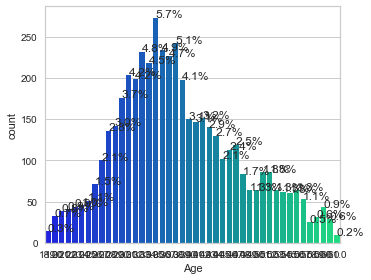

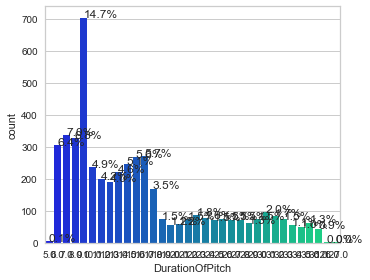

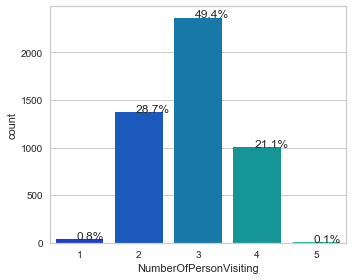

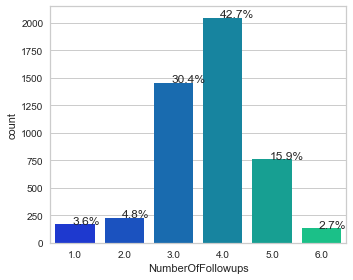

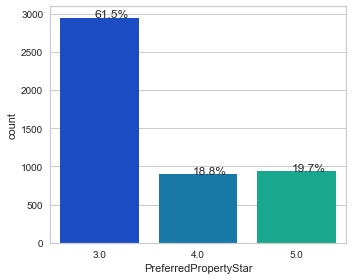

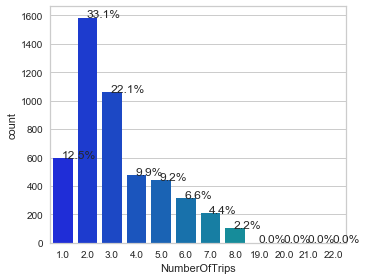

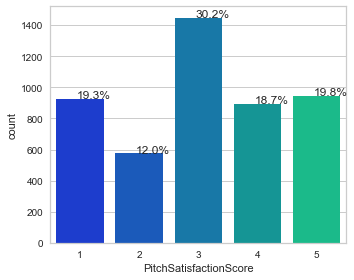

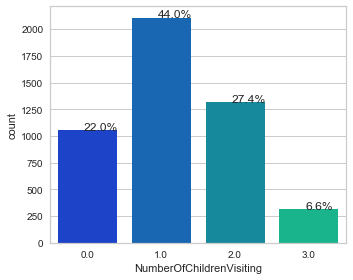

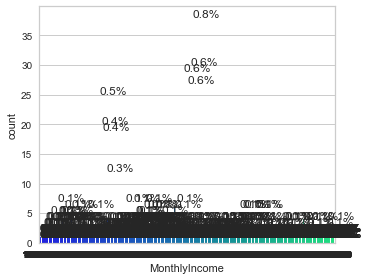

In [24]:
#Plotting univariate analysis on the numerical variables

pos = 1

for i in num_cols:
           
    plt.figure(figsize=(18,20))
    plt.subplot(4, 3, pos)

    ax = sns.countplot(tourismData[i], palette="winter")
    
    perc_on_bar(ax, tourismData)

    pos += 1 

# Bivariate Analysis

In [25]:
tourismData.info() #checking the datatypes and non-null count in the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4792 entries, 0 to 4887
Data columns (total 19 columns):
ProdTaken                   4792 non-null int64
Age                         4792 non-null float64
TypeofContact               4792 non-null object
CityTier                    4792 non-null category
DurationOfPitch             4792 non-null float64
Occupation                  4792 non-null object
Gender                      4792 non-null object
NumberOfPersonVisiting      4792 non-null int64
NumberOfFollowups           4792 non-null float64
ProductPitched              4792 non-null object
PreferredPropertyStar       4792 non-null float64
MaritalStatus               4792 non-null object
NumberOfTrips               4792 non-null float64
Passport                    4792 non-null category
PitchSatisfactionScore      4792 non-null int64
OwnCar                      4792 non-null category
NumberOfChildrenVisiting    4792 non-null float64
Designation                 4792 non-null object
Mo

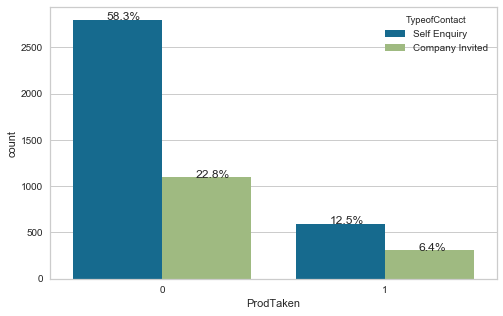

In [26]:
#Plotting the dependent variable "ProdTaken" against the other categorical variables

plt.figure(figsize=(8, 5))
ax = sns.countplot(tourismData.ProdTaken, hue=tourismData.TypeofContact)
perc_on_bar(ax, tourismData)

Most of the customers who have purchased a package were contacted based on self enquiry

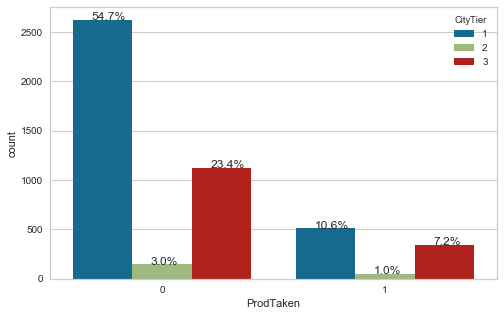

In [27]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(tourismData.ProdTaken, hue=tourismData.CityTier)
perc_on_bar(ax, tourismData)

Most of the customers who have purchased a package were from Tier 1 Cities

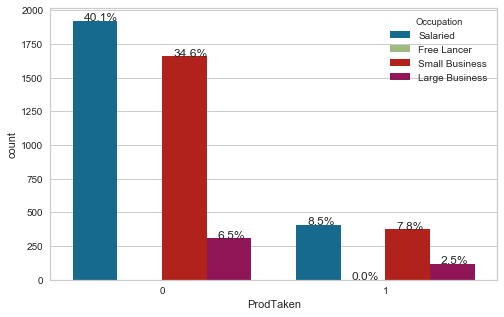

In [28]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(tourismData.ProdTaken, hue=tourismData.Occupation)
perc_on_bar(ax, tourismData)

Most of the customers who have purchased a package were Salaried and Owners of Small Businesses

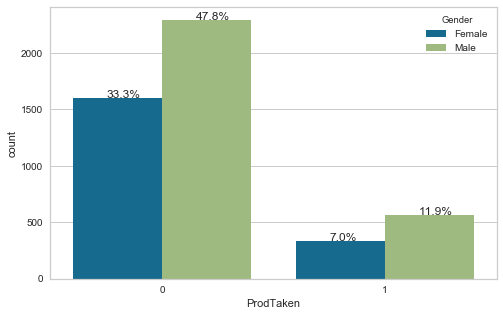

In [29]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(tourismData.ProdTaken, hue=tourismData.Gender)
perc_on_bar(ax, tourismData)

Most of the customers who have purchased a package were Male

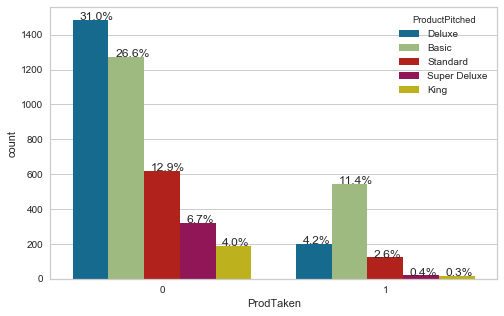

In [30]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(tourismData.ProdTaken, hue=tourismData.ProductPitched)
perc_on_bar(ax, tourismData)

Most of the customers who have purchased a package were pitched on the Basic product

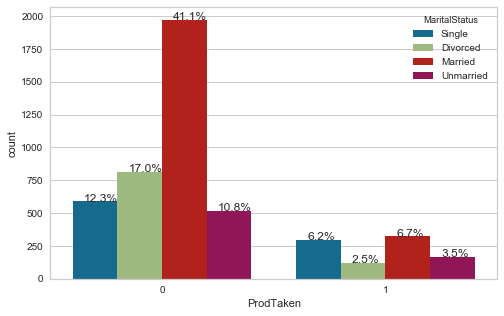

In [31]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(tourismData.ProdTaken, hue=tourismData.MaritalStatus)
perc_on_bar(ax, tourismData)

Most of the customers who have purchased a package were Single and Married Customers

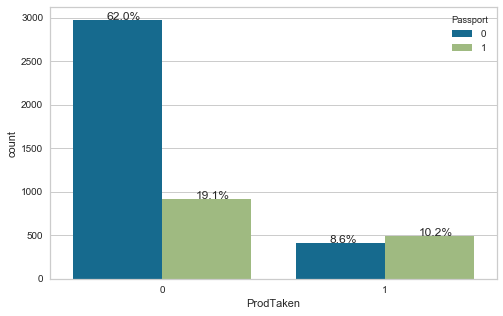

In [32]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(tourismData.ProdTaken, hue=tourismData.Passport)
perc_on_bar(ax, tourismData)

Most of the customers who have purchased a package owned a passport

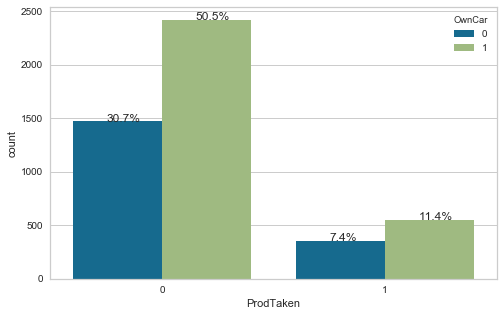

In [33]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(tourismData.ProdTaken, hue=tourismData.OwnCar)
perc_on_bar(ax, tourismData)

Most of the customers who have purchased a package owned a car

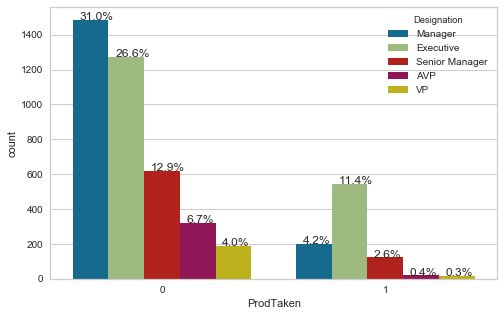

In [34]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(tourismData.ProdTaken, hue=tourismData.Designation)
perc_on_bar(ax, tourismData)

Most of the customers who have purchased a package were Executives

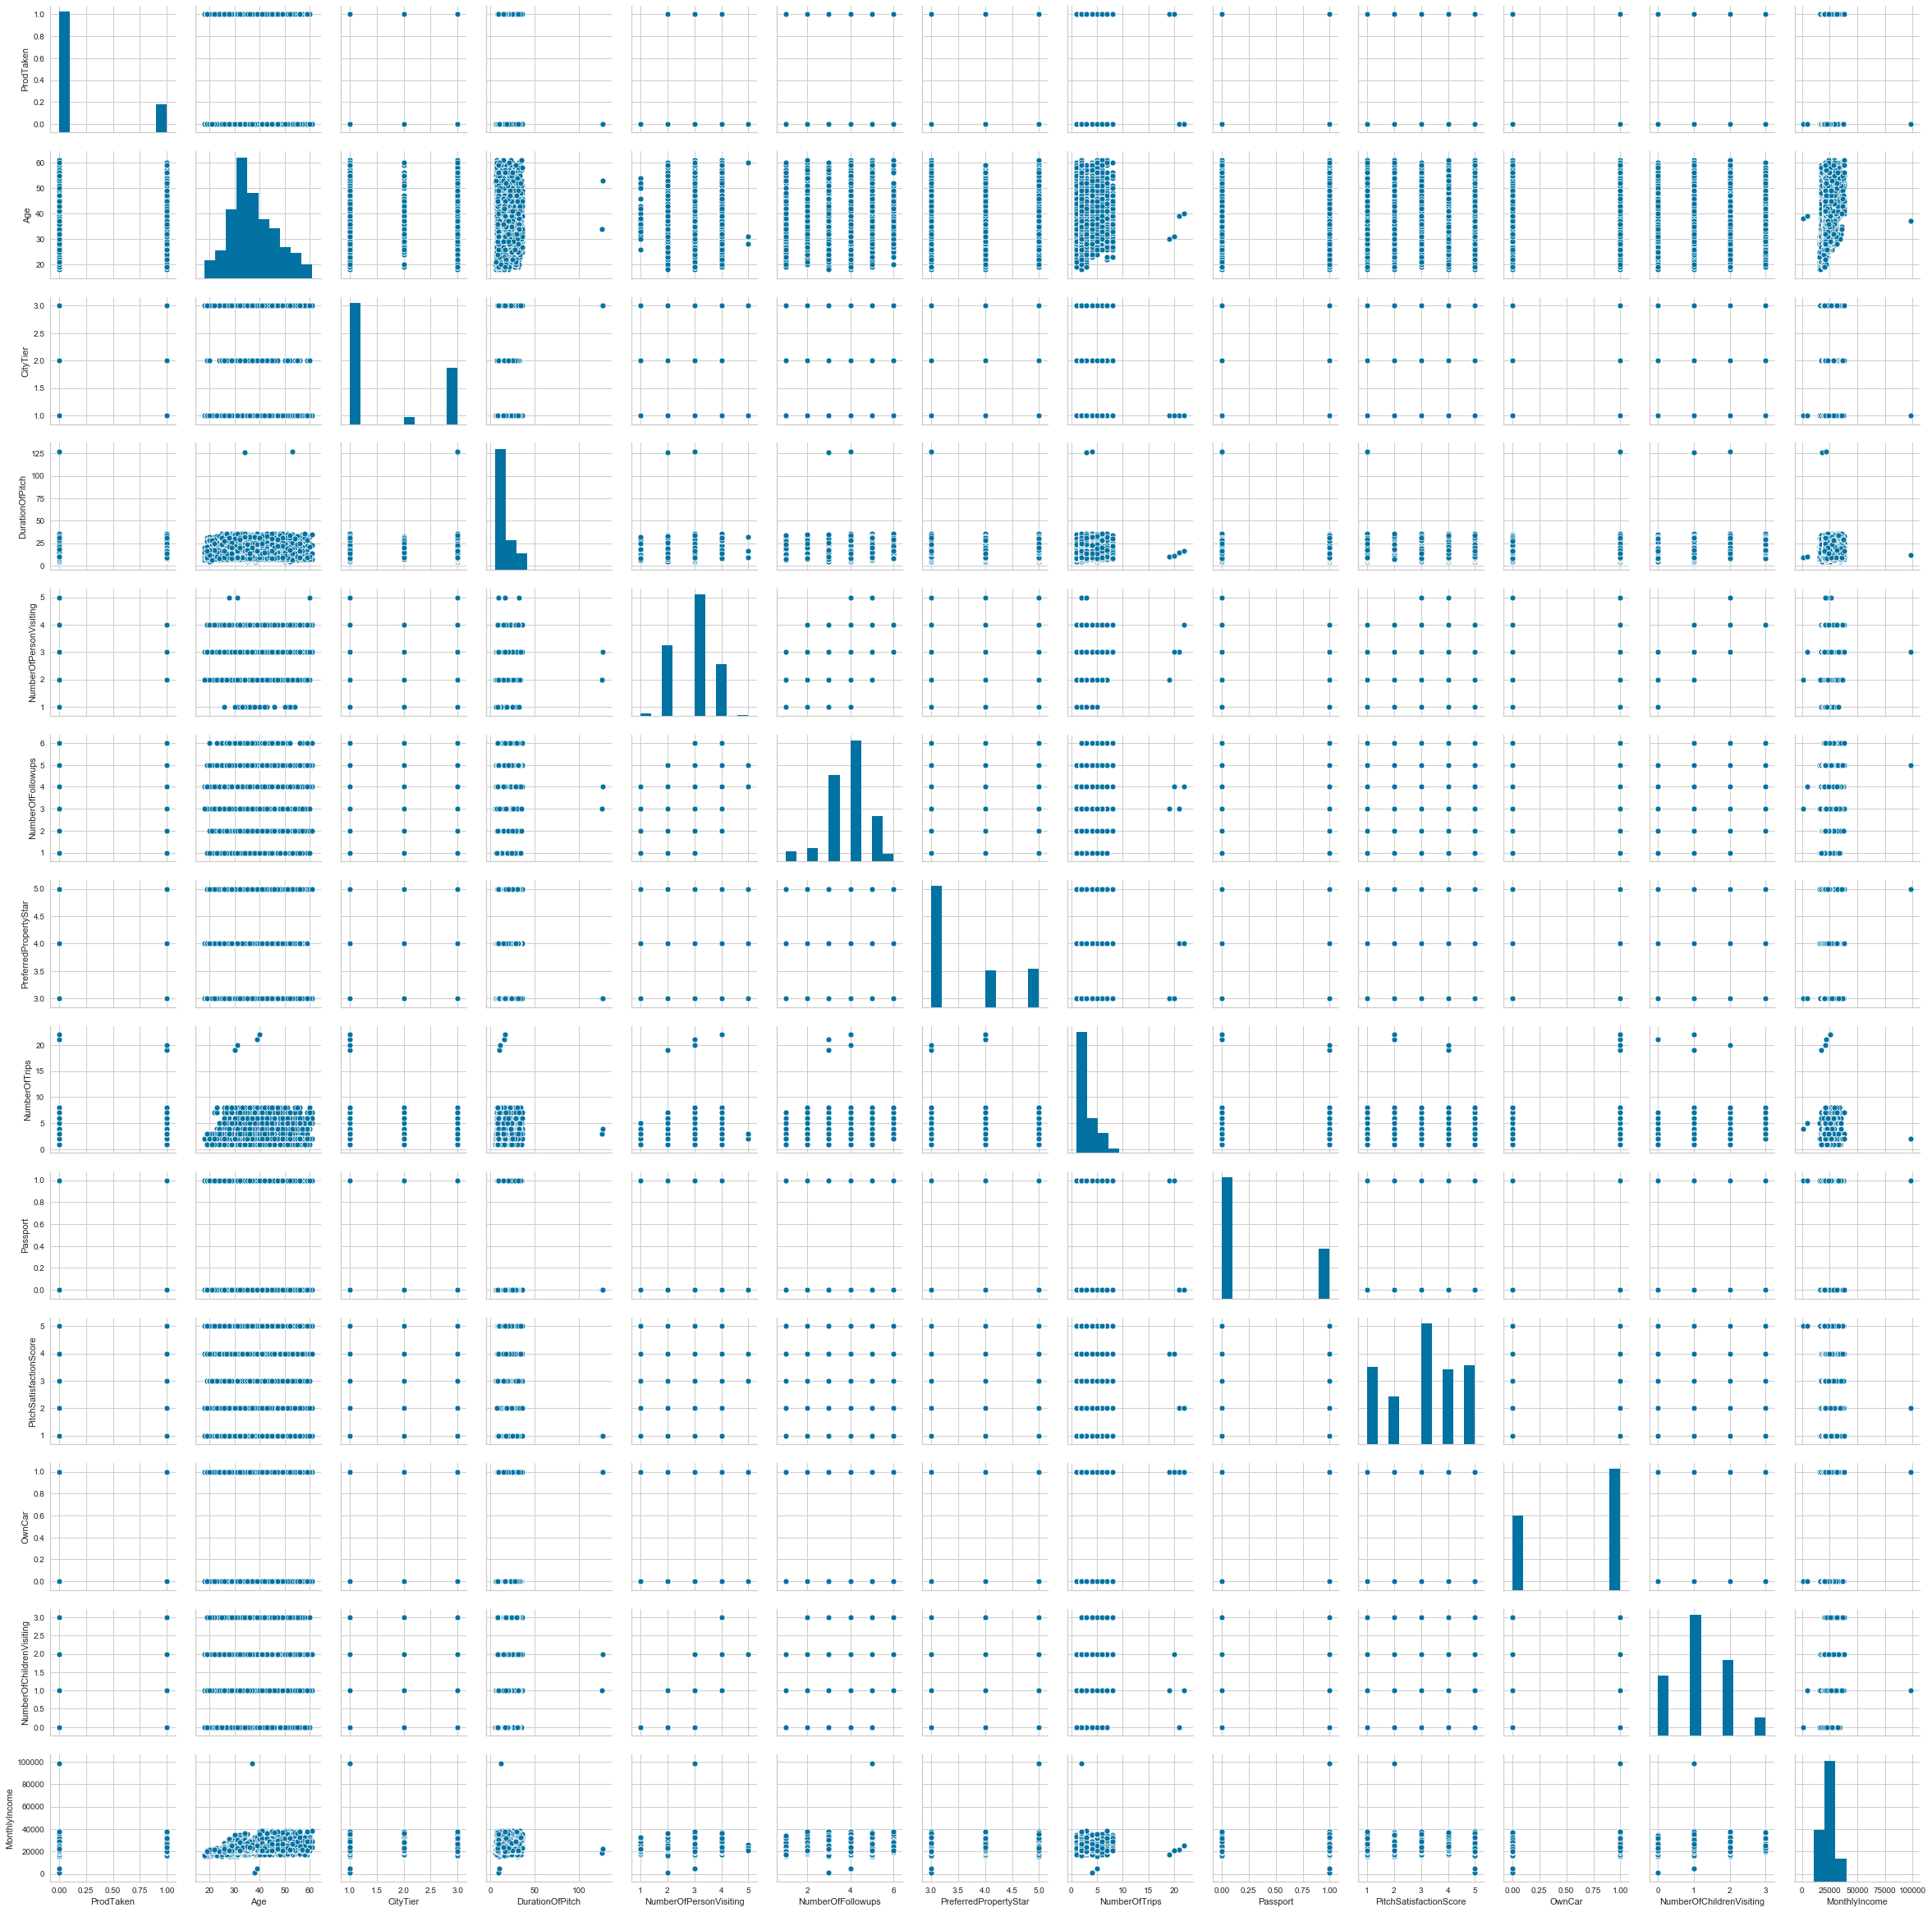

In [35]:
sns.pairplot(tourismData); #Checking the relationship between the numerical variables using pairplot

In [36]:
correlation = tourismData[num_cols].corr().round(2) #checking the correlation between the numerical variables
correlation

,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,MonthlyIncome
Age,1.00,-0.00,0.02,-0.00,-0.02,0.15,0.02,0.00,0.47
DurationOfPitch,-0.00,1.00,0.08,0.03,-0.01,0.02,-0.00,0.05,0.02
NumberOfPersonVisiting,0.02,0.08,1.00,0.33,0.04,0.18,-0.02,0.61,0.20
NumberOfFollowups,-0.00,0.03,0.33,1.00,-0.03,0.13,0.00,0.29,0.17
PreferredPropertyStar,-0.02,-0.01,0.04,-0.03,1.00,0.01,-0.02,0.04,0.01
NumberOfTrips,0.15,0.02,0.18,0.13,0.01,1.00,-0.01,0.15,0.07
PitchSatisfactionScore,0.02,-0.00,-0.02,0.00,-0.02,-0.01,1.00,-0.00,0.03
NumberOfChildrenVisiting,0.00,0.05,0.61,0.29,0.04,0.15,-0.00,1.00,0.19
MonthlyIncome,0.47,0.02,0.20,0.17,0.01,0.07,0.03,0.19,1.00


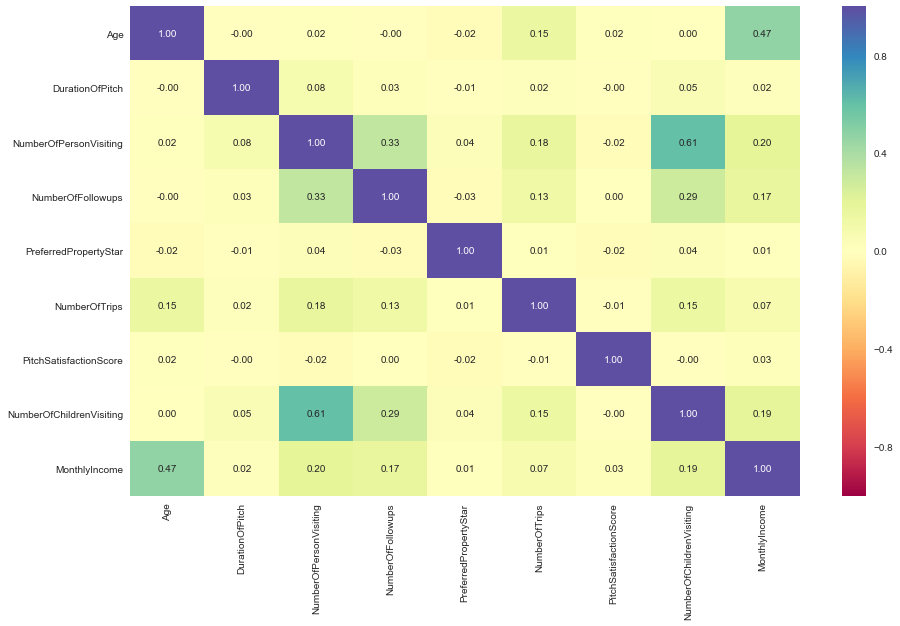

In [37]:
plt.figure(figsize=(15, 9))

sns.heatmap(
    tourismData[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- Most of the variables are not correlatable
- NumberofChildrenVisiting and NumberofPersonVisiting are moderately correlated.

In [38]:
tourismData

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,32.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


In [39]:
tourismData=pd.get_dummies(tourismData, drop_first=True) #Applying one hot encoding

tourismData.head()

,ProdTaken,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,MonthlyIncome,...,ProductPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Passport_1,OwnCar_1,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,6.0,3,3.0,3.0,1.0,2,0.0,20993.0,...,0,0,1,0,1,1,0,1,0,0
1,0,49.0,14.0,3,4.0,4.0,2.0,3,2.0,20130.0,...,0,0,0,0,0,1,0,1,0,0
2,1,37.0,8.0,3,4.0,3.0,7.0,3,0.0,17090.0,...,0,0,1,0,1,0,1,0,0,0
3,0,33.0,9.0,2,3.0,3.0,2.0,5,1.0,17909.0,...,0,0,0,0,1,1,1,0,0,0
4,0,32.0,8.0,2,3.0,4.0,1.0,5,0.0,18468.0,...,0,0,0,0,0,1,1,0,0,0


In [40]:
tourismData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4792 entries, 0 to 4887
Data columns (total 30 columns):
ProdTaken                      4792 non-null int64
Age                            4792 non-null float64
DurationOfPitch                4792 non-null float64
NumberOfPersonVisiting         4792 non-null int64
NumberOfFollowups              4792 non-null float64
PreferredPropertyStar          4792 non-null float64
NumberOfTrips                  4792 non-null float64
PitchSatisfactionScore         4792 non-null int64
NumberOfChildrenVisiting       4792 non-null float64
MonthlyIncome                  4792 non-null float64
TypeofContact_Self Enquiry     4792 non-null uint8
CityTier_2                     4792 non-null uint8
CityTier_3                     4792 non-null uint8
Occupation_Large Business      4792 non-null uint8
Occupation_Salaried            4792 non-null uint8
Occupation_Small Business      4792 non-null uint8
Gender_Male                    4792 non-null uint8
ProductPitch

# Model Building

In [41]:
X = tourismData.drop(['ProdTaken'],axis=1)

y = tourismData.ProdTaken

In [42]:
# Splitting data into training and test set:

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

print(X_train.shape, X_test.shape)

(3354, 29) (1438, 29)


In [43]:
y.value_counts(normalize=True) #Original data

0    0.811561
1    0.188439
Name: ProdTaken, dtype: float64

In [44]:
y_train.value_counts(normalize=True) #Training

0    0.811568
1    0.188432
Name: ProdTaken, dtype: float64

In [45]:
y_test.value_counts(normalize=True) #Test

0    0.811544
1    0.188456
Name: ProdTaken, dtype: float64

# Model Evaluation Metric

In [46]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score, precision_score, confusion_matrix #-----model validation scores

In [47]:
from sklearn.utils import class_weight

class_weights = dict(zip(np.unique(y_train), class_weight.compute_class_weight('balanced', np.unique(y_train), 
                y_train))) 

print(class_weights)

{0: 0.6160911094783248, 1: 2.653481012658228}


The class weight for the dependent varaiables are 0: 0.61 and 1: 2.65 respectively

### Build Decision Tree Model

Building the model using the DecisionTreeClassifer function. Using default 'gini criteria' to split

In [48]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1, class_weight=class_weights)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.6160911094783248,
                                     1: 2.653481012658228},
                       random_state=1)

In [49]:
treeObj = dTree.tree_

print ('Total Nodes:',treeObj.node_count)

print('Depth:',dTree.get_depth())

print('Total Leaves:',dTree.get_n_leaves())

Total Nodes: 937
Depth: 22
Total Leaves: 469


In [50]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.8880389429763561


There is disparity between the model on the training and test dataset score values which highlights the need to have a look at the accuracy performance measure

In [51]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [52]:
##  Function to calculate recall score
def get_recall_score(model,X_train, X_test):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

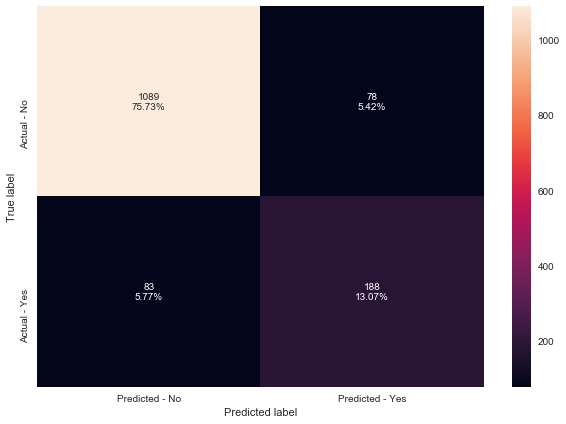

In [53]:
make_confusion_matrix(dTree,y_test)

In [54]:
# Recall on train and test
get_recall_score(dTree, X_train, X_test)

Recall on training set :  1.0
Recall on test set :  0.6937269372693727


In [55]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisiting', 'MonthlyIncome', 'TypeofContact_Self Enquiry', 'CityTier_2', 'CityTier_3', 'Occupation_Large Business', 'Occupation_Salaried', 'Occupation_Small Business', 'Gender_Male', 'ProductPitched_Deluxe', 'ProductPitched_King', 'ProductPitched_Standard', 'ProductPitched_Super Deluxe', 'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Unmarried', 'Passport_1', 'OwnCar_1', 'Designation_Executive', 'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP']


In [56]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                      Imp
Age                          1.452216e-01
MonthlyIncome                1.291530e-01
DurationOfPitch              1.218211e-01
Passport_1                   1.027295e-01
PitchSatisfactionScore       7.471405e-02
Designation_Executive        6.061012e-02
NumberOfTrips                5.205783e-02
NumberOfFollowups            5.101716e-02
PreferredPropertyStar        4.680386e-02
CityTier_3                   4.139767e-02
TypeofContact_Self Enquiry   2.096246e-02
Gender_Male                  1.769422e-02
NumberOfChildrenVisiting     1.645255e-02
MaritalStatus_Married        1.621594e-02
NumberOfPersonVisiting       1.532655e-02
Occupation_Large Business    1.393500e-02
ProductPitched_Standard      1.391799e-02
OwnCar_1                     1.218350e-02
CityTier_2                   9.339200e-03
MaritalStatus_Unmarried      8.970051e-03
MaritalStatus_Single         6.575294e-03
ProductPitched_Deluxe        6.032720e-03
Designation_Manager          4.992

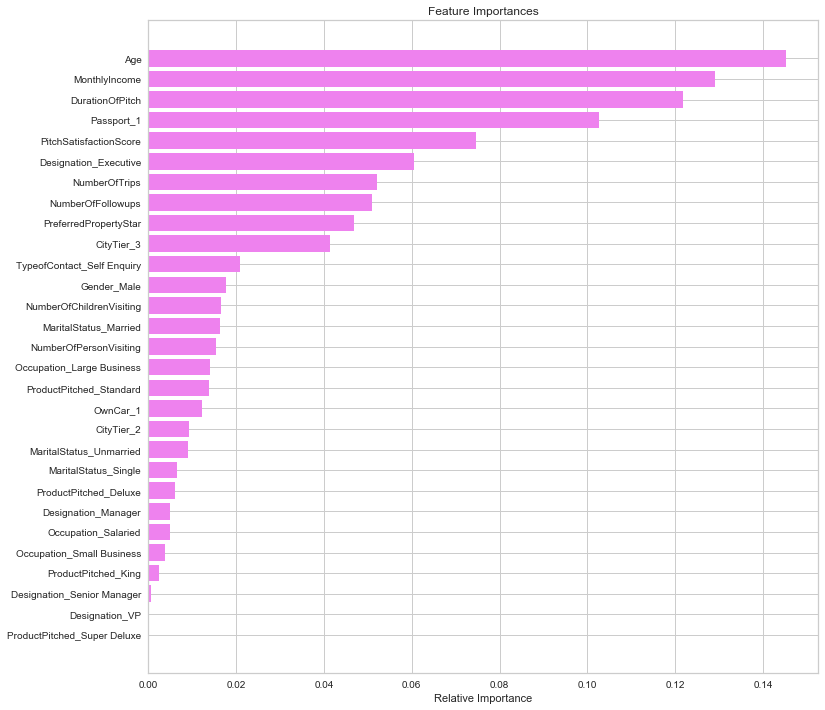

In [57]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- These plots above show that Age, Monthly Income, Executive, Duration of Pitch, Designation_Executive and Owning a Passport are top 5 imporatnt features

- **The tree which appears complex may overfit**

## Reducing over fitting by Pre-prunning

**Using GridSearch for Hyperparameter tuning of our tree model**

In [58]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from (hyper parameters)
parameters = {
            'max_depth': np.arange(2,60),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'], #best, random
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'class_weight': [{0: 0.2, 1: 0.8}],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)#Recall is used as Scoring function

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=9,
                       min_impurity_decrease=1e-06, random_state=1,
                       splitter='random')

## Confusion Matrix - decision tree with tuned hyperparameters

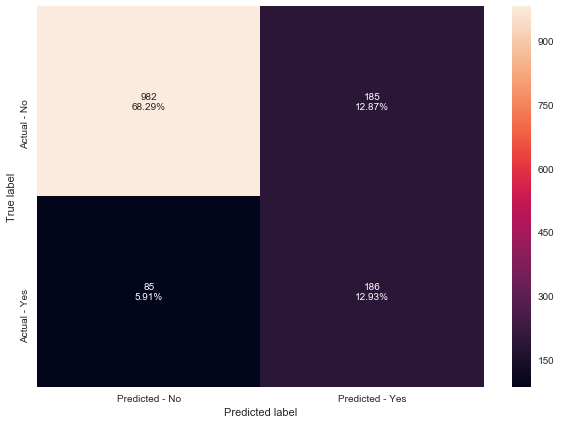

In [59]:
make_confusion_matrix(estimator,y_test)

In [60]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator, X_train, X_test)

Accuracy on training set :  0.8792486583184258
Accuracy on test set :  0.8122392211404729
Recall on training set :  0.9098101265822784
Recall on test set :  0.6863468634686347


* Recall has improved for both train and test set after hyperparameter tuning and indicates no overfiting due to closeness of accuracy score

In [61]:
#importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                                  Imp
Passport_1                   0.149512
Designation_Executive        0.092830
NumberOfTrips                0.078420
CityTier_3                   0.077226
PitchSatisfactionScore       0.076379
Age                          0.067074
PreferredPropertyStar        0.057775
DurationOfPitch              0.040420
Gender_Male                  0.035491
NumberOfFollowups            0.035221
Occupation_Salaried          0.035220
TypeofContact_Self Enquiry   0.034158
Occupation_Large Business    0.028396
MaritalStatus_Single         0.025899
MaritalStatus_Unmarried      0.023595
ProductPitched_Standard      0.023141
NumberOfChildrenVisiting     0.020345
OwnCar_1                     0.020068
MaritalStatus_Married        0.019446
MonthlyIncome                0.018856
Designation_Manager          0.009979
CityTier_2                   0.009398
NumberOfPersonVisiting       0.007777
Occupation_Small Business    0.004000
Designation_VP               0.003791
ProductPitch

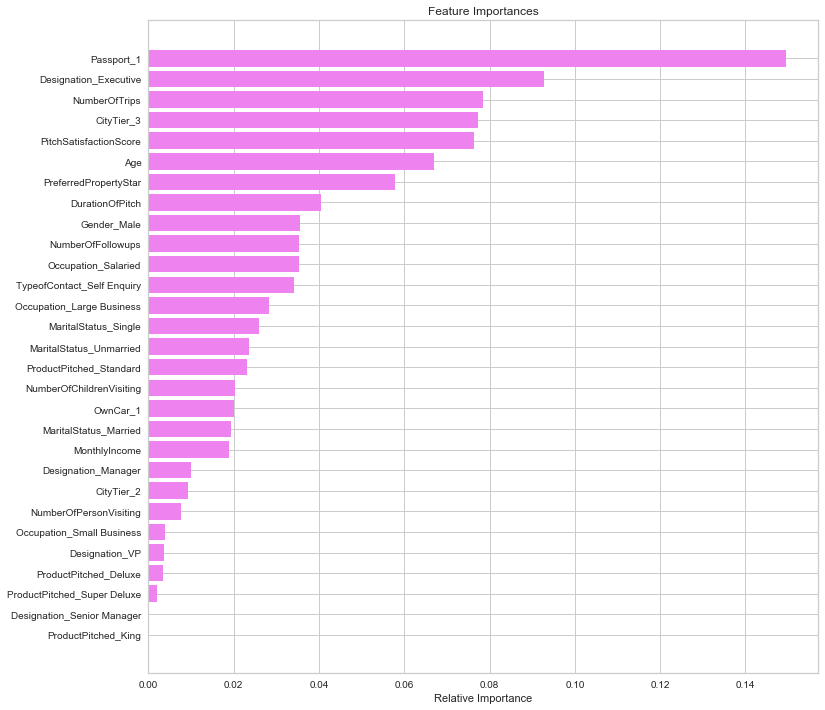

In [62]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Although pitch satisfaction score appears as most impotatnt on Grid search, features like Passport_1, Age, NumberOfTrips, duration of pitch and are still consistently important feature but with lesser important values
- The recall is reduced after using Grid search
- This shows that hyperparameter tuning using Grid Search may not be best
* We will also attempt using limited hyperparameter max depth.

## Pre-prunning Using Max_depth

In [63]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=16,random_state=1)#max depth value obtained from total node & depth statistics
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=16, random_state=1)

## Confusion Matrix - decision tree with depth restricted to 16

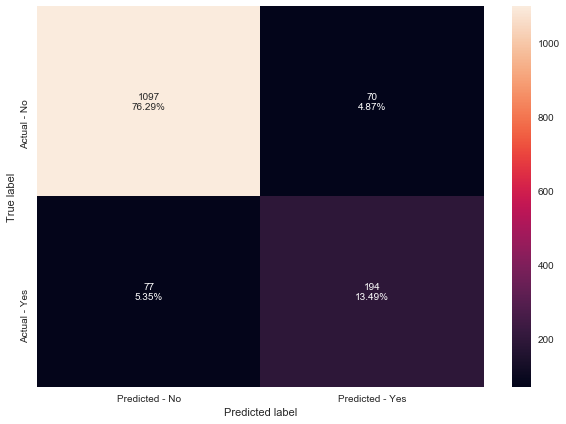

In [64]:
make_confusion_matrix(dTree1, y_test)

In [65]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1, X_train, X_test)

Accuracy on training set :  0.9955277280858676
Accuracy on test set :  0.8977746870653686
Recall on training set :  0.9778481012658228
Recall on test set :  0.7158671586715867


- The recall has improved using limited hyperparameter
- The disparity between the accuracy of testing and training set may indicate overfitting

In [66]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
MonthlyIncome                0.133825
DurationOfPitch              0.126609
Age                          0.125336
NumberOfTrips                0.083234
Designation_Executive        0.080826
Passport_1                   0.073922
PitchSatisfactionScore       0.059345
PreferredPropertyStar        0.041886
NumberOfFollowups            0.040003
TypeofContact_Self Enquiry   0.031096
CityTier_3                   0.028488
MaritalStatus_Single         0.026331
Gender_Male                  0.021696
Occupation_Large Business    0.020277
NumberOfPersonVisiting       0.017449
MaritalStatus_Unmarried      0.016505
MaritalStatus_Married        0.013284
NumberOfChildrenVisiting     0.012688
CityTier_2                   0.011540
ProductPitched_Deluxe        0.006750
OwnCar_1                     0.006347
Occupation_Small Business    0.005385
Designation_Senior Manager   0.004480
Occupation_Salaried          0.004301
ProductPitched_Super Deluxe  0.003287
ProductPitch

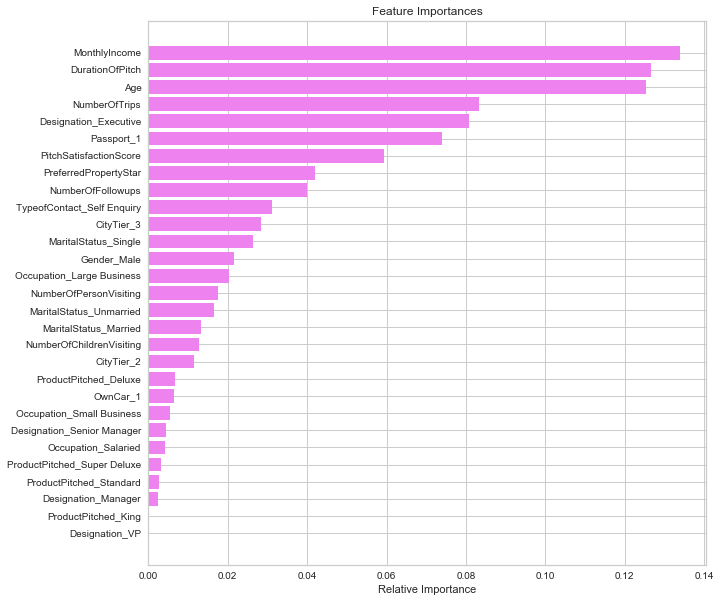

In [67]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- These plots above show that MonthlyIncome, DurationOfPitch, Age, NumberOfTrips and Designation_Executive are top six important features

## Cost Complexity Pruning

In [68]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.61, 1: 2.65})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [69]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-1.315120e-16
1,1.218335e-19,-1.313901e-16
2,2.436671e-19,-1.311465e-16
3,2.436671e-19,-1.309028e-16
4,2.436671e-19,-1.306591e-16
5,2.436671e-19,-1.304155e-16
6,3.528512e-19,-1.300626e-16
7,3.528512e-19,-1.297098e-16
8,3.528512e-19,-1.293569e-16
9,3.528512e-19,-1.290041e-16


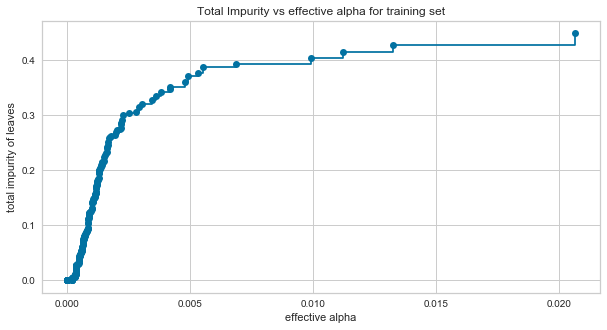

In [70]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

- Effective alpha and total impurity grow to the point where they become static at 0.005 and 0.4
- Next, we train a decision tree using the effective alphas

In [71]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.61, 1: 2.65}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.051330824303432165


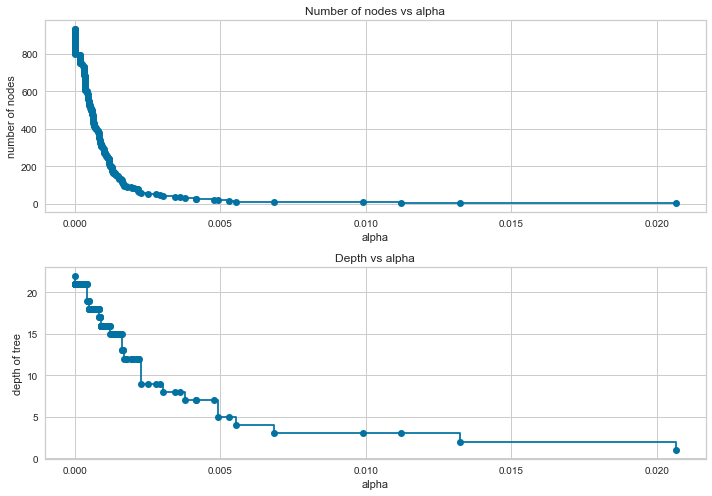

In [72]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

- As alpha goes larger and increases, the depth of the nodes decreases.

In [73]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

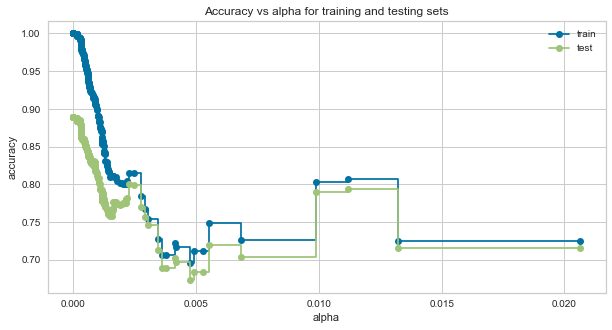

In [74]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [75]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(class_weight={0: 0.61, 1: 2.65}, random_state=1)
Training accuracy of best model:  1.0
Test accuracy of best model:  0.8887343532684284


In [76]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(X_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

In [77]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(X_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

In [78]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

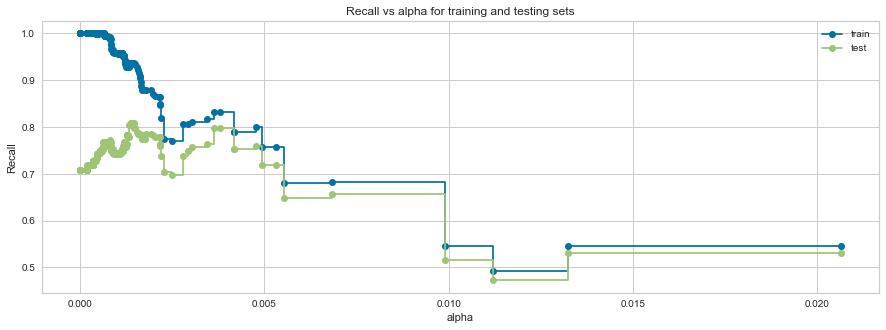

In [79]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [80]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0013742636178095948,
                       class_weight={0: 0.61, 1: 2.65}, random_state=1)


In [81]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0013742636178095948,
                       class_weight={0: 0.61, 1: 2.65}, random_state=1)

In [82]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0013742636178095948,
                       class_weight={0: 0.61, 1: 2.65}, random_state=1)


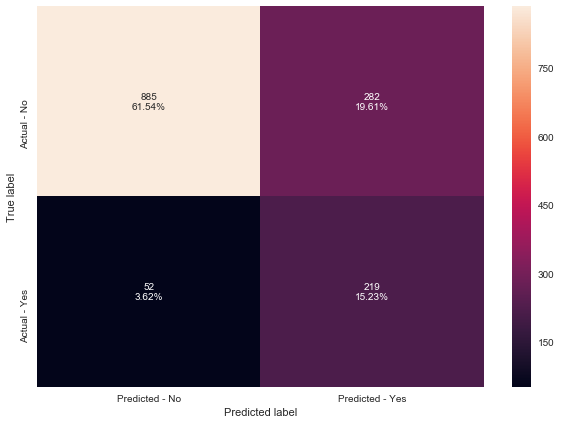

In [83]:
make_confusion_matrix(best_model, y_test)

In [84]:
get_recall_score(best_model,X_train, X_test)

Recall on training set :  0.9367088607594937
Recall on test set :  0.8081180811808119


In [85]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.004, class_weight={0: 0.61, 1:2.65}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.004, class_weight={0: 0.61, 1: 2.65},
                       random_state=1)

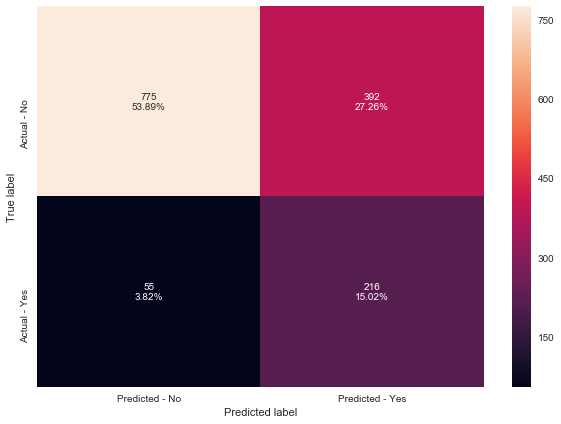

In [86]:
make_confusion_matrix(best_model2, y_test)

In [87]:
get_recall_score(best_model2,X_train, X_test)

Recall on training set :  0.8322784810126582
Recall on test set :  0.7970479704797048


**Higher recall than the hyperparameter tuned model and generalized decision tree - having comparable performance on training and test set.**

# Building Ensemble Model: Bagging

In [88]:
from sklearn.ensemble import BaggingClassifier
#base_estimator for bagging classifier is a decision tree by default
bgcl = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini',class_weight=class_weights,random_state=1),\
                         n_estimators=100, max_samples= .8, bootstrap=True, random_state=22)


#------bootstrap=True signifies that entire sample is not used to develop a tree

bgcl = bgcl.fit(X_train, y_train)

In [89]:
print("Train: %.2f" % bgcl.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % bgcl.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.91


- Here accuracy is 100% on Training and 91% on test data because every tree inside a bagging classifier is a full grown tree, hence, you expect accuarcy to be 100%

In [90]:
get_recall_score(bgcl, X_train, X_test)

Recall on training set :  0.9920886075949367
Recall on test set :  0.5867158671586716


- Here Recall is 99% on Training and 58% on test data

# Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(class_weight=class_weights,\
                              n_estimators = 100, max_samples=0.8, random_state=42)#use 80%of data to build the tree
#Train the random forest classifier
rfcl = rfcl.fit(X_train, y_train)

rfcl

RandomForestClassifier(class_weight={0: 0.6160911094783248,
                                     1: 2.653481012658228},
                       max_samples=0.8, random_state=42)

In [92]:
print("Train: %.2f" % rfcl.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % rfcl.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.89


In [93]:
get_recall_score(rfcl, X_train, X_test)

Recall on training set :  1.0
Recall on test set :  0.43911439114391143


- The recall has dropped drastically and may be due to non selection of the right/ optimal hyperparameters

**Considering that Decision tree still remains the best model with the highest recall, we would now hypertune the model on bagging and Random forest to check for improvement**

In [94]:
rfcl.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1608637542),
 DecisionTreeClassifier(max_features='auto', random_state=1273642419),
 DecisionTreeClassifier(max_features='auto', random_state=1935803228),
 DecisionTreeClassifier(max_features='auto', random_state=787846414),
 DecisionTreeClassifier(max_features='auto', random_state=996406378),
 DecisionTreeClassifier(max_features='auto', random_state=1201263687),
 DecisionTreeClassifier(max_features='auto', random_state=423734972),
 DecisionTreeClassifier(max_features='auto', random_state=415968276),
 DecisionTreeClassifier(max_features='auto', random_state=670094950),
 DecisionTreeClassifier(max_features='auto', random_state=1914837113),
 DecisionTreeClassifier(max_features='auto', random_state=669991378),
 DecisionTreeClassifier(max_features='auto', random_state=429389014),
 DecisionTreeClassifier(max_features='auto', random_state=249467210),
 DecisionTreeClassifier(max_features='auto', random_state=1972458954),
 DecisionTreeC

In [95]:
rfcl.estimators_[0] #Provides the first decision tree in the forest

DecisionTreeClassifier(max_features='auto', random_state=1608637542)

In [96]:
for i in range(0,100):#to identify the max & min hyperparameter
    print(rfcl.estimators_[i].tree_.max_depth, end=",")

20,20,18,21,21,24,20,18,24,19,18,22,24,20,23,19,17,18,21,19,19,19,19,18,21,21,20,22,24,23,17,20,18,22,19,19,20,23,18,19,22,20,19,21,20,23,20,20,18,23,25,22,17,19,22,19,20,20,19,23,19,19,23,19,24,20,18,19,21,17,18,19,20,20,18,19,17,18,26,21,21,21,20,18,21,23,21,19,23,16,19,17,19,22,21,20,20,19,20,20,

- Max and Min depth needed for prunning the tree can be between 16 - 22
- These are obtained from the different decision trees that make up the random forest model

# Grid Search CV

In [97]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(criterion='gini',class_weight=class_weights,random_state=1)

param_grid = {'base_estimator':[cl1],
              'n_estimators':[10, 20, 50, 100],
              'max_samples': [0.7,0.8,0.9,1],#set of samples model would use for tunning 
             }

grid = GridSearchCV(BaggingClassifier(random_state=1,bootstrap=True), param_grid=param_grid, scoring = 'recall', cv = 5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'base_estimator': [DecisionTreeClassifier(class_weight={0: 0.6160911094783248,
                                                                                 1: 2.653481012658228},
                                                                   random_state=1)],
                         'max_samples': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [10, 20, 50, 100]},
             scoring='recall')

In [98]:
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.6160911094783248,
                                                                      1: 2.653481012658228},
                                                        random_state=1),
                  max_samples=0.9, n_estimators=50, random_state=1)

In [99]:
print("Train: %.2f" % bagging_estimator.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % bagging_estimator.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.91


In [100]:
get_recall_score(bagging_estimator, X_train, X_test)

Recall on training set :  1.0
Recall on test set :  0.6014760147601476


In [101]:
# Choose the type of classifier. 
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {  
        "n_estimators": [10, 20, 50], #3
        "max_features": [0.7,0.9,'log2','auto'], #70% of independent variable, 90% of ind var, log(total number of ind var)
        "max_samples": [0.7,0.9,None], #3
        "max_depth": [16, 17, 19, 20, 23]
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=0.7, n_estimators=50,
                       random_state=1)

In [102]:
grid_obj.cv_results_['std_test_score'].shape# number of Grid search parameter combinations

(180,)

In [103]:
print("Train: %.2f" % rf_estimator.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % rf_estimator.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.93


In [104]:
get_recall_score(rf_estimator, X_train, X_test)

Recall on training set :  1.0
Recall on test set :  0.6789667896678967


# Creating the Final Output

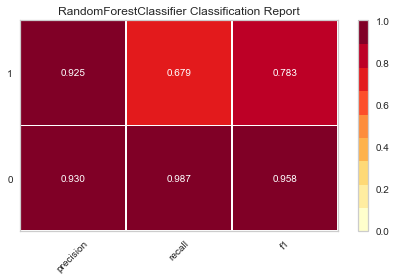

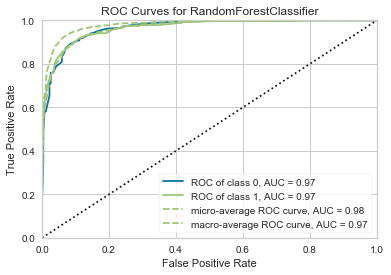

In [105]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(rf_estimator)#to create confusion matrix
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

roc = ROCAUC(rf_estimator)#to create ROc curve using rf_estimator
roc.fit(X_train, y_train)
roc.score(X_test, y_test.astype(int))
roc.show();

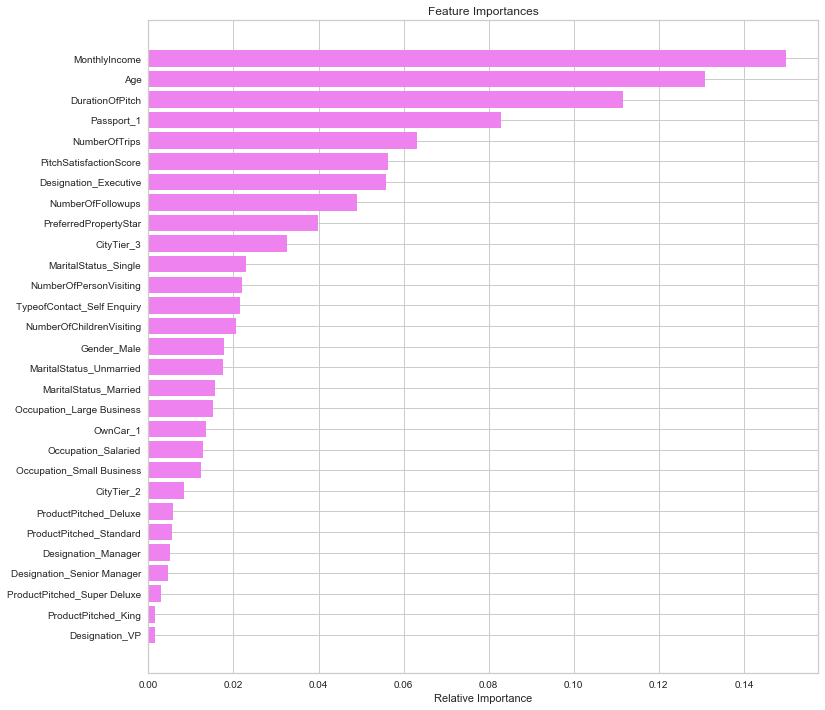

In [106]:
feature_names = X_train.columns

importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

From the chart, MonthlyIncome, Age, DurationofPitch, Passport_1 and NumberOfTrips are the top 5 features 

# Boosting Models

In [107]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [108]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [109]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_score=get_metrics_score(abc)

Accuracy on training set :  0.8422778771615981
Accuracy on test set :  0.8331015299026425
Recall on training set :  0.3259493670886076
Recall on test set :  0.2915129151291513
Precision on training set :  0.6666666666666666
Precision on test set :  0.6220472440944882


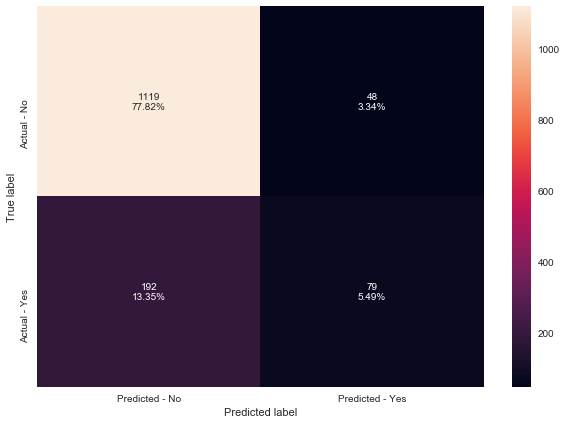

In [110]:
make_confusion_matrix(abc,y_test)

# Gradient Boosting Classifier

In [111]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [112]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_score=get_metrics_score(gbc)

Accuracy on training set :  0.894752534287418
Accuracy on test set :  0.8609179415855355
Recall on training set :  0.5110759493670886
Recall on test set :  0.34686346863468637
Precision on training set :  0.8801089918256131
Precision on test set :  0.8034188034188035


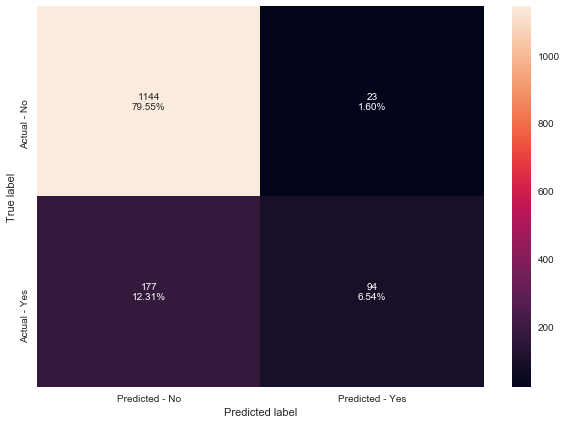

In [113]:
make_confusion_matrix(gbc,y_test)

# XGBoost Classifier

In [114]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [115]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_score=get_metrics_score(xgb)

Accuracy on training set :  0.9997018485390579
Accuracy on test set :  0.9214186369958275
Recall on training set :  0.9984177215189873
Recall on test set :  0.6605166051660517
Precision on training set :  1.0
Precision on test set :  0.895


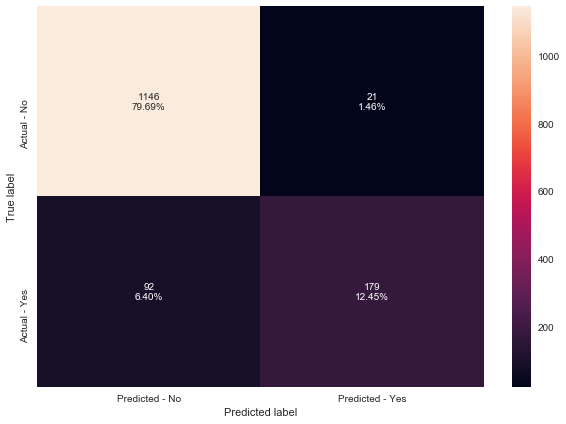

In [116]:
make_confusion_matrix(xgb,y_test)

# Hyperparameter Tuning

In [117]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.4000000000000001, n_estimators=100,
                   random_state=1)

In [118]:
#Using above defined function to get accuracy, recall and precision on train and test set
abc_tuned_score=get_metrics_score(abc_tuned)

Accuracy on training set :  0.9958258795468098
Accuracy on test set :  0.8762169680111266
Recall on training set :  0.9794303797468354
Recall on test set :  0.6420664206642066
Precision on training set :  0.9983870967741936
Precision on test set :  0.6823529411764706


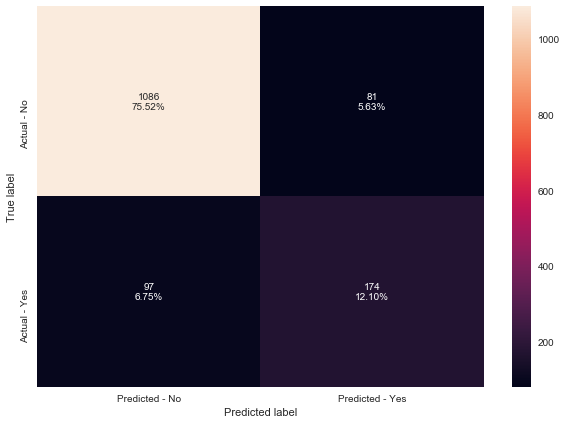

In [119]:
make_confusion_matrix(abc_tuned,y_test)

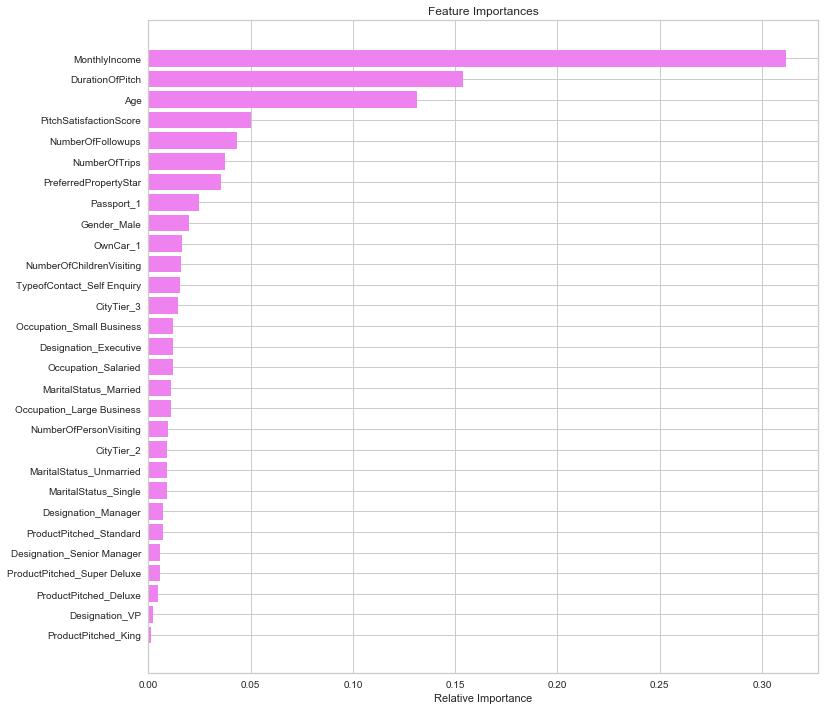

In [120]:
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

MonthlyIncome, DurationOfPitch and Age, PitchSatisfaction and NumberOfFollowups are the top 5 features from the chart above

# Gradient Boosting Classifier

**Using AdaBoost classifier as the estimator for initial prediction**

In [121]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [122]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_init_score=get_metrics_score(gbc_init)

Accuracy on training set :  0.8941562313655337
Accuracy on test set :  0.8643949930458971
Recall on training set :  0.5063291139240507
Recall on test set :  0.36162361623616235
Precision on training set :  0.8815426997245179
Precision on test set :  0.8166666666666667


In [123]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.8)

In [124]:
#Using above defined function to get accuracy, recall and precision on train and test set
gbc_tuned_score=get_metrics_score(gbc_tuned)

Accuracy on training set :  0.9242695289206917
Accuracy on test set :  0.872739916550765
Recall on training set :  0.6471518987341772
Recall on test set :  0.4354243542435424
Precision on training set :  0.9295454545454546
Precision on test set :  0.7972972972972973


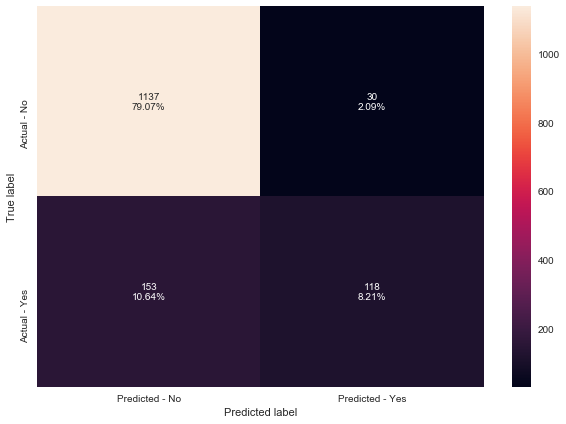

In [125]:
make_confusion_matrix(gbc_tuned,y_test)

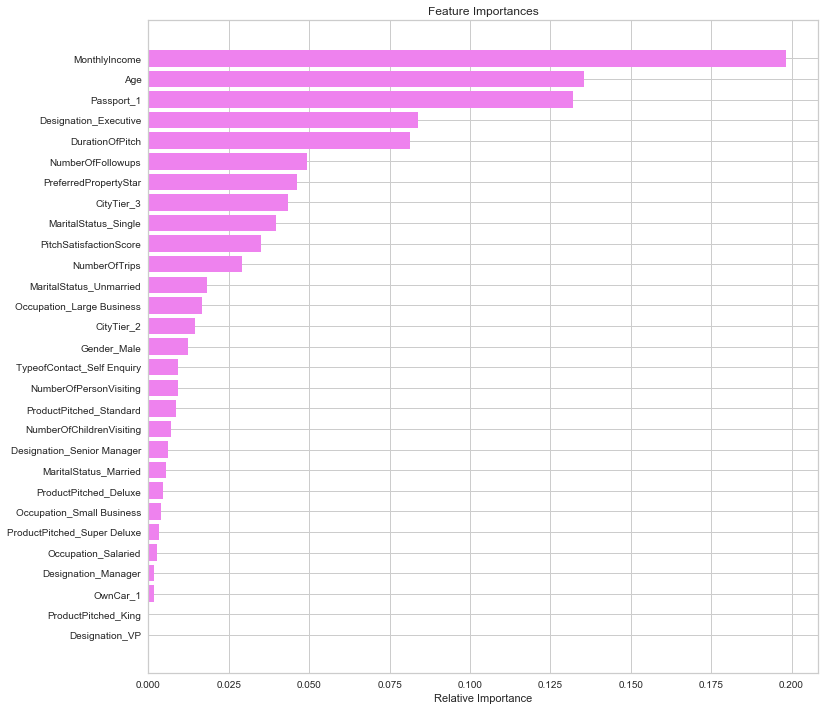

In [126]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

MonthlyIncome, Age, Passport_1, Designation_Executive and DurationOfPitch are the top 5 features from the chart

# XGBoost Classifier

In [127]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": np.arange(10,100,20),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=3, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=90, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [128]:
#Using above defined function to get accuracy, recall and precision on train and test set
xgb_tuned_score=get_metrics_score(xgb_tuned)

Accuracy on training set :  0.960644007155635
Accuracy on test set :  0.8873435326842837
Recall on training set :  0.9810126582278481
Recall on test set :  0.8118081180811808
Precision on training set :  0.8378378378378378
Precision on test set :  0.6646525679758308


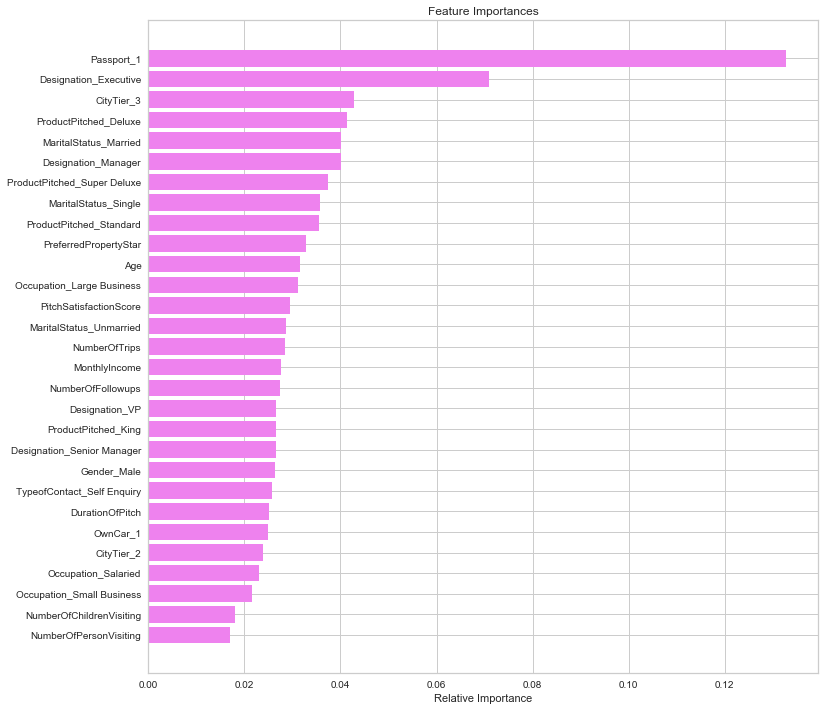

In [129]:
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Passport_1, Designation_Executive, City Tier_3, ProductPitched_Deluxe and MaritalStatus are the top 5 features

# Stacking Model

Building a stacking model with the tuned models - decision tree, random forest and gradient boosting, then use XGBoost to get the final prediction

In [130]:
estimators=[('Decision Tree', best_model2),('Random Forest', rf_estimator),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [131]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

[14:10:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(ccp_alpha=0.004,
                                                       class_weight={0: 0.61,
                                                                     1: 2.65},
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=20,
                                                       max_features=0.7,
                                                       n_estimators=50,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                          

In [132]:
stacking_estimator_score=get_metrics_score(stacking_estimator)

Accuracy on training set :  0.9994036970781157
Accuracy on test set :  0.9235048678720446
Recall on training set :  1.0
Recall on test set :  0.8007380073800738
Precision on training set :  0.9968454258675079
Precision on test set :  0.7948717948717948


In [134]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(pd.DataFrame(xgb_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                  Imp
Passport_1                   0.132773
Designation_Executive        0.070849
CityTier_3                   0.042836
ProductPitched_Deluxe        0.041284
MaritalStatus_Married        0.040177
Designation_Manager          0.040169
ProductPitched_Super Deluxe  0.037494
MaritalStatus_Single         0.035718
ProductPitched_Standard      0.035600
PreferredPropertyStar        0.032919
Age                          0.031516
Occupation_Large Business    0.031231
PitchSatisfactionScore       0.029513
MaritalStatus_Unmarried      0.028734
NumberOfTrips                0.028431
MonthlyIncome                0.027612
NumberOfFollowups            0.027482
Designation_VP               0.026634
ProductPitched_King          0.026629
Designation_Senior Manager   0.026614
Gender_Male                  0.026475
TypeofContact_Self Enquiry   0.025772
DurationOfPitch              0.025225
OwnCar_1                     0.024942
CityTier_2                   0.023798
Occupation_S

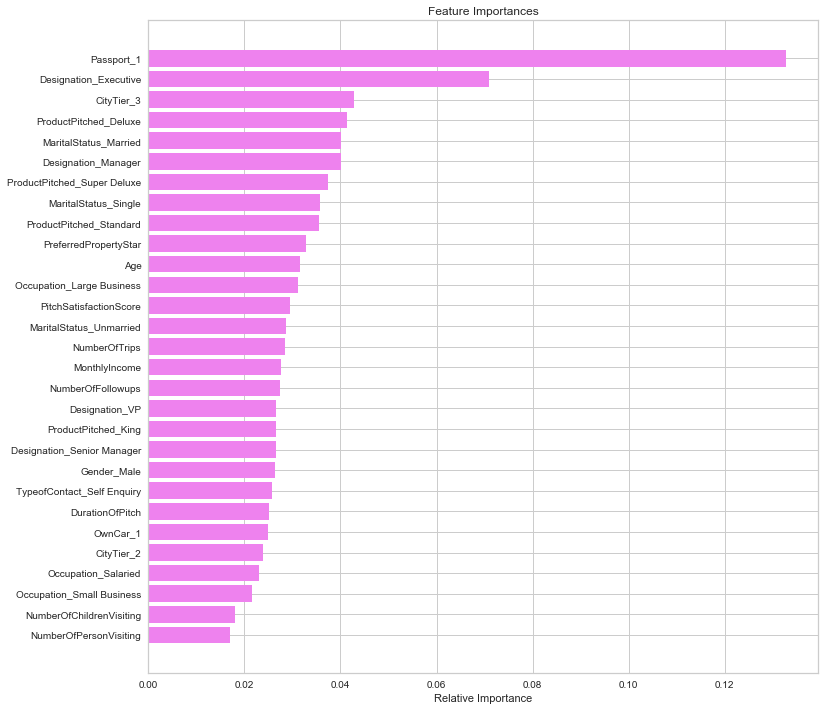

In [135]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Passport_1, Designation_Executive, CityTier_3, ProductPitched_Deluxe and MaritalStaus are the top 5 features

# Comparing all models

In [136]:
# defining list of models
models = [dTree, estimator, dTree1, clf, bgcl, rfcl, bagging_estimator, rf_estimator, abc, abc_tuned, gbc, gbc_init, gbc_tuned, xgb, xgb_tuned, stacking_estimator]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy, precall and precision scores
for model in models:
    j = get_metrics_score(model,False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))

In [137]:
comparison_frame = pd.DataFrame({'Model':['Decision Tree with Gini','Decision Tree - Grid Search','Decision Tree - Max Depth','Decision Tree with post-pruning','Bagging with default parameters','Random Forest','Bagging - Grid Search','Random Forest - Grid Search','AdaBoost with default paramters','AdaBoost Tuned', 
                                          'Gradient Boosting with default parameters','Gradient Boosting with init=AdaBoost',
                                          'Gradient Boosting Tuned','XGBoost with default parameters','XGBoost Tuned','Stacking Model'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree with Gini,1.00,0.89,1.00,0.69,1.00,0.71
1,Decision Tree - Grid Search,0.88,0.81,0.91,0.69,0.62,0.50
2,Decision Tree - Max Depth,1.00,0.90,0.98,0.72,1.00,0.73
3,Decision Tree with post-pruning,0.73,0.72,0.55,0.53,0.35,0.34
4,Bagging with default parameters,1.00,0.91,0.99,0.59,1.00,0.92
5,Random Forest,1.00,0.89,1.00,0.44,1.00,0.97
6,Bagging - Grid Search,1.00,0.91,1.00,0.60,1.00,0.92
7,Random Forest - Grid Search,1.00,0.93,1.00,0.68,1.00,0.92
8,AdaBoost with default paramters,0.84,0.83,0.33,0.29,0.67,0.62
9,AdaBoost Tuned,1.00,0.88,0.98,0.64,1.00,0.68


# Business Insights/ Conclusions

- Most of the customers that purchased the products made self enquiry
- City Tier 1 accounts for most of the products purchased while City Tier 2 accounts for the least of the products purchased however City Tier 2 has the highest percentage of the products taken compared to the total population
- Salary earners and small business customers account for most product purchased while free lancer customers account for zero purchases
- Most of products were purchased by males
- Most customers who bought the product were pitched with the basic product and the least pitched was the King product (This might be indicative of the prices of the products)
- Couples account for most product purchased
- Most customers who bought the product are Passport holders
- Executives account for most of the products
- Correlation between customers' information is generally poor

- **XGBoost Tuned is the best model to use with a Train Recall score of 0.98 and Test Recall Score of 0.81**
- Across all models, Passport_1 and Monthly Income and Designation_Executive are the most important features

# Recommendations

- Company invite routes should be discouraged
- Future campaigns should be targetted at City Tier 1
- Future campaigns should focus on Salaried and small business owners while a survey should be carried out on the free-lancer customers to figure out their dislike for the products
- Packages should be designed to be more appealing to the female population
- Periodic promotions should be embarked upon for the standard, deluxe, super-deluxe and king to woo customers as price might be a major factor
- Future campaigns should target couples as they account for majority of the population
- A survey should be carried out on the non-passport holders to ascertain their dislike for the products considering that they account for majority of the population
- Carry out survey to figure out why managers are not subscribed to the product as they account for majority of the population
- **XGBoost Tuned should be adopted for future forecasts as it has proven to be a more predictive tool**
- Passport_1, Monthly Income and Designation_Executive are important factors that need to be considered for framing the next product as they have overwelming impact on product acceptance